<a href="https://colab.research.google.com/github/Meidyt/DA/blob/main/Machine_learning(soalno12).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tes Digital Talent
Meidy Tataluckyta - 21240-0000070

## Preprocessing & EDA

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
df_status =  pd.read_csv('https://raw.githubusercontent.com/Meidyt/DA/main/Telco_customer_churn_status.csv', sep =",")
df_demography = pd.read_csv('https://raw.githubusercontent.com/Meidyt/DA/main/Telco_customer_churn_demographics.csv', sep =",")
df_service =  pd.read_csv('https://raw.githubusercontent.com/Meidyt/DA/main/Telco_customer_churn_services.csv', sep =",")
df1= df_demography.merge(df_status, on=['Customer_ID','Count'], how='inner')
df= df1.merge(df_service, on=['Customer_ID','Count'], how='inner')

df.head() 

,Customer_ID,Count,Gender,Age,Under_30,Senior_Citizen,Married,Dependents,Number_of_Dependents,Quarter_x,Satisfaction_Score,Customer_Status,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Category,Churn_Reason,Quarter_y,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly_Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total_revenue
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data,Q3,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer_ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Gender                             7043 non-null   object 
 3   Age                                7043 non-null   int64  
 4   Under_30                           7043 non-null   object 
 5   Senior_Citizen                     7043 non-null   object 
 6   Married                            7043 non-null   object 
 7   Dependents                         7043 non-null   object 
 8   Number_of_Dependents               7043 non-null   int64  
 9   Quarter_x                          7043 non-null   object 
 10  Satisfaction_Score                 7043 non-null   int64  
 11  Customer_Status                    7043 non-null   objec

In [ ]:
df["Churn_Label"] = df["Churn_Label"].map({"Yes":1,"No":0})
df["Gender"] = df["Gender"].map({"Male":1,"Female":0})  
df["Under_30"] = df["Under_30"].map({"Yes":1,"No":0}) 
df["Married"] = df["Married"].map({"Yes":1,"No":0})
df["Dependents"] = df["Dependents"].map({"Yes":1,"No":0})
df["Senior_Citizen"] = df["Senior_Citizen"].map({"Yes":1,"No":0})
df["Customer_Status"] = df["Customer_Status"].map({"Churned":0,"Joined":1, "Stayed":2})
df.head()

,Customer_ID,Count,Gender,Age,Under_30,Senior_Citizen,Married,Dependents,Number_of_Dependents,Quarter_x,Satisfaction_Score,Customer_Status,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Category,Churn_Reason,Quarter_y,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly_Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total_revenue
0,8779-QRDMV,1,1,78,0,1,0,0,0,Q3,3,0,1,1,91,5433,Competitor,Competitor offered more data,Q3,No,0,1,None,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,0,74,0,1,1,1,1,Q3,3,0,1,1,69,5302,Competitor,Competitor made better offer,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,1,71,0,1,0,1,3,Q3,2,0,1,1,81,3179,Competitor,Competitor made better offer,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,0,78,0,1,1,1,1,Q3,2,0,1,1,88,5337,Dissatisfaction,Limited range of services,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,0,80,0,1,1,1,1,Q3,2,0,1,1,67,2793,Price,Extra data charges,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [ ]:
from sklearn.preprocessing import StandardScaler
cols_to_norm = ['Age','Total_revenue']
df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])

In [ ]:
X = np.asarray(df[['Age','Gender','Under_30','Married','Dependents','Senior_Citizen','Satisfaction_Score','Total_revenue']])
X[0:5]

array([[ 1.88011037,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  3.        , -1.03829944],
       [ 1.64129246,  0.        ,  0.        ,  1.        ,  1.        ,
         1.        ,  3.        , -0.70166781],
       [ 1.46217902,  1.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  2.        , -0.39214611],
       [ 1.88011037,  0.        ,  0.        ,  1.        ,  1.        ,
         1.        ,  2.        , -0.01372043],
       [ 1.99951933,  0.        ,  0.        ,  1.        ,  1.        ,
         1.        ,  2.        ,  0.02372807]])

In [ ]:
y = np.asarray(df['Churn_Label'])
y [0:5]

array([1, 1, 1, 1, 1])

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.88011037,  0.99053183, -0.49831336, -0.96662231, -0.54809324,
         2.27315869, -0.20383637, -1.03829944],
       [ 1.64129246, -1.00955867, -0.49831336,  1.03453023,  1.82450707,
         2.27315869, -0.20383637, -0.70166781],
       [ 1.46217902,  0.99053183, -0.49831336, -0.96662231,  1.82450707,
         2.27315869, -1.0360796 , -0.39214611],
       [ 1.88011037, -1.00955867, -0.49831336,  1.03453023,  1.82450707,
         2.27315869, -1.0360796 , -0.01372043],
       [ 1.99951933, -1.00955867, -0.49831336,  1.03453023,  1.82450707,
         2.27315869, -1.0360796 ,  0.02372807]])

### Train & Test Data Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=16)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5634, 8) (5634,)
Test set: (1409, 8) (1409,)


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.79165913, 0.20834087],
       [0.26009625, 0.73990375],
       [0.04518992, 0.95481008],
       ...,
       [0.94382363, 0.05617637],
       [0.91618881, 0.08381119],
       [0.95792711, 0.04207289]])

### Evaluation

In [ ]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.9368346344925479

In [ ]:
acc_LR = metrics.accuracy_score(y_test, yhat)
prec_LR = metrics.precision_score(y_test, yhat)
rec_LR = metrics.recall_score(y_test, yhat)
f1_LR = metrics.f1_score(y_test, yhat)
kappa_LR = metrics.cohen_kappa_score(y_test, yhat)
print("Accuracy:", acc_LR)
print("Precision:", prec_LR)
print("Recall:", rec_LR)
print("F1 Score:", f1_LR)
print("Cohens Kappa Score:", kappa_LR)

Accuracy: 0.9368346344925479
Precision: 0.9695945945945946
Recall: 0.782016348773842
F1 Score: 0.8657616892911011
Cohens Kappa Score: 0.8250795435365733


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 287   80]
 [   9 1033]]


Confusion matrix, without normalization
[[ 287   80]
 [   9 1033]]


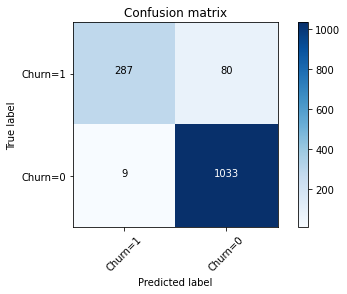

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Churn=1','Churn=0'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1042
           1       0.97      0.78      0.87       367

    accuracy                           0.94      1409
   macro avg       0.95      0.89      0.91      1409
weighted avg       0.94      0.94      0.93      1409



In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.20216516322531483

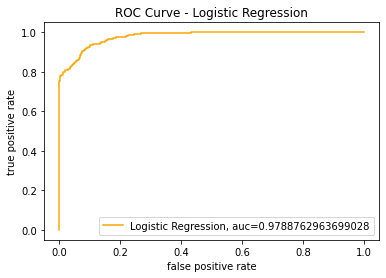

In [ ]:
# ROC Curve
yhat_prob = LR.predict_proba(X_test) [::,1]
fprLR, tprLR, _ = metrics.roc_curve(y_test,  yhat_prob)
auclr = metrics.roc_auc_score(y_test, yhat_prob)
plt.plot(fprLR,tprLR,label="Logistic Regression, auc="+str(auclr), color="orange")
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)

plt.show()

## Naive Bayes Classifier

In [ ]:
# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict to Test Data
y_gnb= gnb.predict(X_test)

In [ ]:
acc_gnb = metrics.accuracy_score(y_test, y_gnb)
prec_gnb = metrics.precision_score(y_test, y_gnb)
rec_gnb = metrics.recall_score(y_test, y_gnb)
f1_gnb = metrics.f1_score(y_test, y_gnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.9041873669268985
Precision: 0.8558282208588958
Recall: 0.7602179836512262
F1 Score: 0.8051948051948052
Cohens Kappa Score: 0.7419599458999693


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_gnb, labels=[1,0]))

[[279  88]
 [ 47 995]]


Confusion matrix, without normalization
[[279  88]
 [ 47 995]]


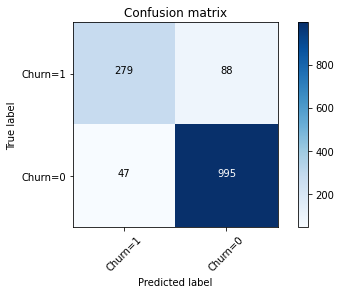

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_gnb, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Churn=1','Churn=0'],normalize= False,  title='Confusion matrix')

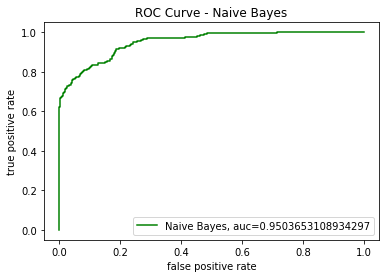

In [ ]:
# ROC Curve
y_gnb_prob = gnb.predict_proba(X_test)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_gnb_prob)
aucgnb = metrics.roc_auc_score(y_test, y_gnb_prob)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb),color="green")
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

## Plot Perbandingan

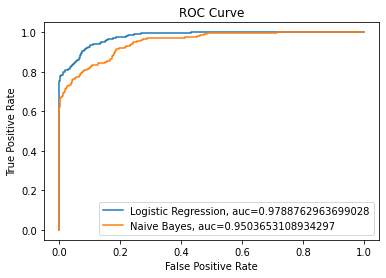

In [ ]:
plt.plot(fprLR,tprLR,label="Logistic Regression, auc="+str(auclr))
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

## Soal 12

In [ ]:
y_prediksi =  LR.predict(X)

In [ ]:
Pelanggan_churn = np.count_nonzero(y_prediksi  == 1)
Pelanggan_tdkchurn = np.count_nonzero(y_prediksi  == 0)

In [ ]:
print("Jumlah prediksi pelanggan yang akan berpindah (churn) adalah sebesar", Pelanggan_churn,"orang")

Jumlah prediksi pelanggan yang akan berpindah (churn) adalah sebesar 1503 orang
